In [1]:
import pandas as pd
data=pd.read_csv('mushrooms.csv')
data.describe

<bound method NDFrame.describe of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-r

In [2]:
data.isnull().sum()
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
print(data.head())
X=data.iloc[:,0:4].values
Y=data.iloc[:,4].values

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)
print("Size of training set:",xtrain.shape)
print("Size of testing set:",len(xtest))

Size of training set: (6093, 4)
Size of testing set: 2031


[Text(0.6065705128205128, 0.9583333333333334, 'x[0] <= 0.5\ngini = 0.489\nsamples = 3831\nvalue = [3504, 2589]'),
 Text(0.3798076923076923, 0.875, 'x[2] <= 2.5\ngini = 0.45\nsamples = 1991\nvalue = [1079, 2080]'),
 Text(0.20673076923076922, 0.7916666666666666, 'x[1] <= 2.5\ngini = 0.5\nsamples = 1261\nvalue = [1020, 972]'),
 Text(0.08974358974358974, 0.7083333333333334, 'x[3] <= 2.5\ngini = 0.499\nsamples = 580\nvalue = [442, 492]'),
 Text(0.038461538461538464, 0.625, 'x[2] <= 1.0\ngini = 0.06\nsamples = 83\nvalue = [4, 126]'),
 Text(0.02564102564102564, 0.5416666666666666, 'x[3] <= 1.5\ngini = 0.068\nsamples = 72\nvalue = [4, 110]'),
 Text(0.01282051282051282, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(0.038461538461538464, 0.4583333333333333, 'gini = 0.0\nsamples = 69\nvalue = [0, 110]'),
 Text(0.05128205128205128, 0.5416666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 16]'),
 Text(0.14102564102564102, 0.625, 'x[2] <= 1.0\ngini = 0.496\nsamples = 497\nv

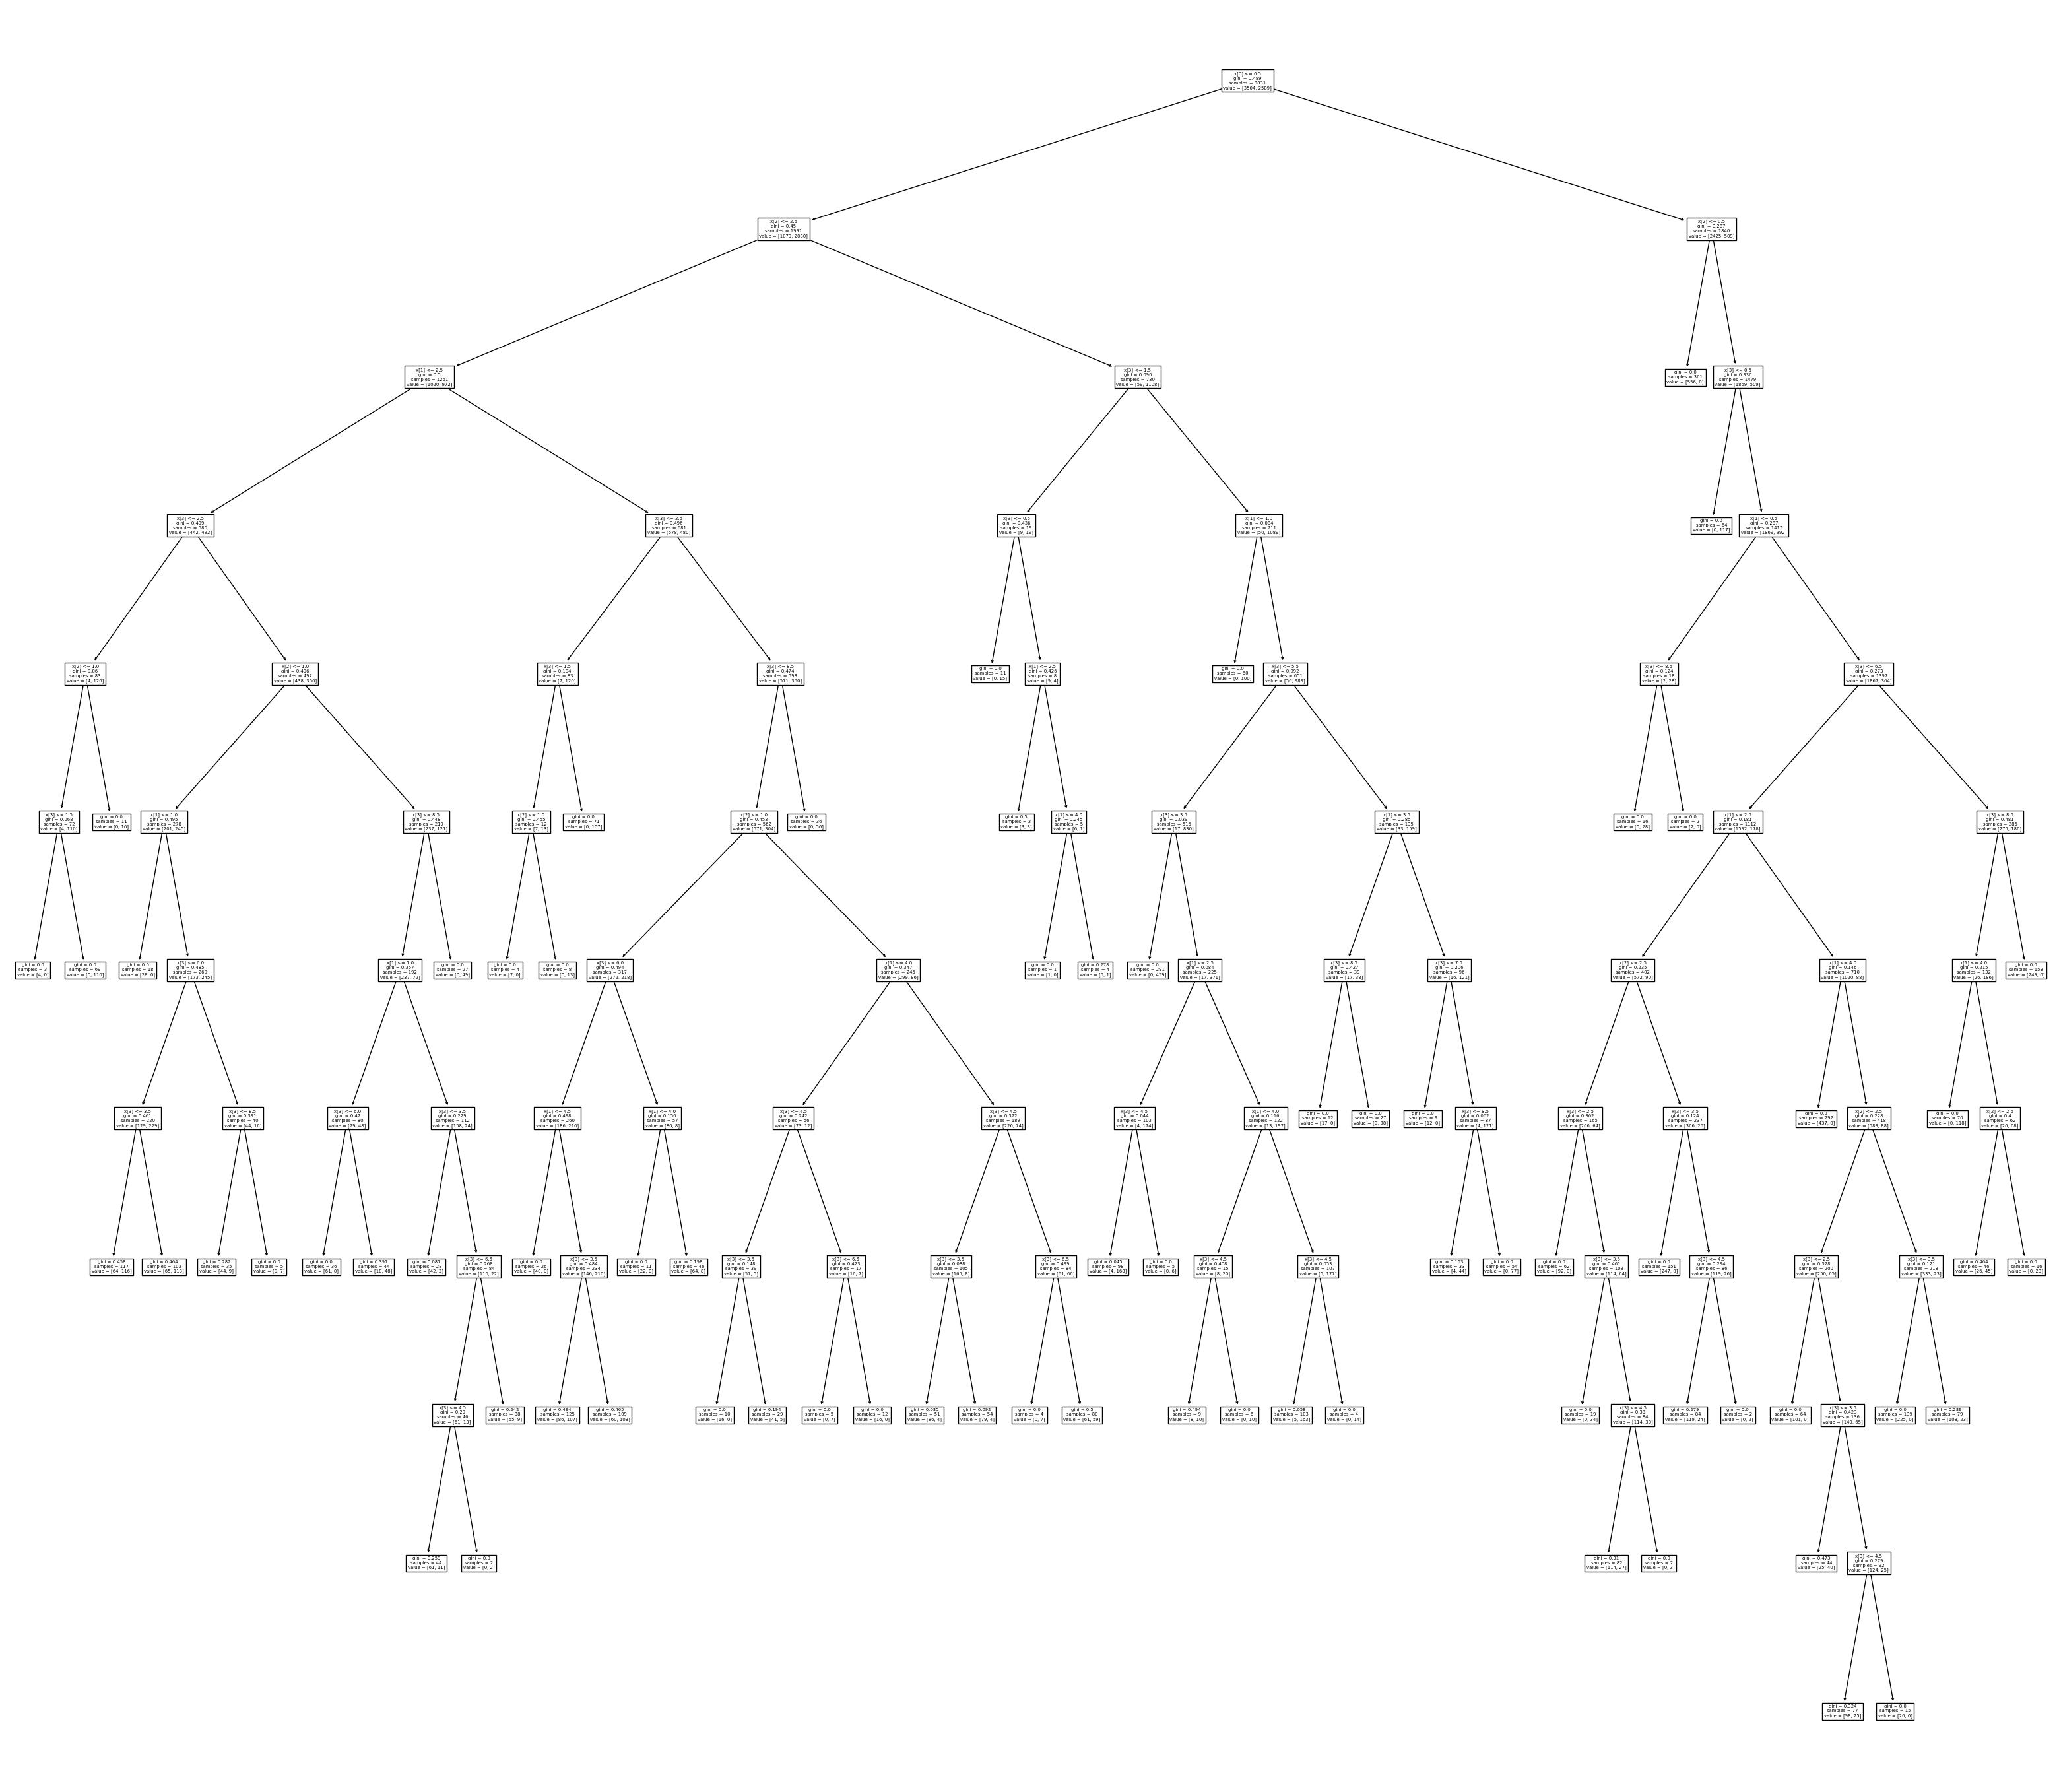

In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
cls=RandomForestClassifier(n_estimators=20,random_state=0)
cls.fit(xtrain,ytrain)
ypred=cls.predict(xtest)
cls.estimators_
plt.figure(figsize=(40,35))
tree.plot_tree(cls.estimators_[0])

In [5]:
from sklearn.metrics import confusion_matrix,log_loss,mean_squared_error,classification_report,accuracy_score
import numpy as np
print("Confusion matrix:",confusion_matrix(ytest,ypred))
print("Classification report:",classification_report(ytest,ypred))
print("Log loss:",log_loss(ytest,ypred))
print("Mean squared error:",mean_squared_error(ytest,ypred))
print("Standard deviation:",np.sqrt(mean_squared_error(ytest,ypred)))
print("Accuracy Score:",accuracy_score(ytest,ypred))

Confusion matrix: [[1082  111]
 [  77  761]]
Classification report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1193
           1       0.87      0.91      0.89       838

    accuracy                           0.91      2031
   macro avg       0.90      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031

Log loss: 3.3363893831383677
Mean squared error: 0.09256523879862137
Standard deviation: 0.30424535953506565
Accuracy Score: 0.9074347612013787
